# Q1. Your views about the problem statement?

The Problem Statement is Faily Clear, We have to Devise a Machine Learning Model of Predictive Analysis
for determining the salary of newly hired employees using the given data. So we have to define an Approach and perform the task required in a proper way to get a meaningful and valuable Machine Learning model for our Salary Prediction Based on certain Predictors which we are provided like, Previous CTC, College studied from, Graduation Marks , Experience etc.

# Importing Librarys

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn 
import statsmodels.discrete.discrete_model as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.model_selection import train_test_split,validation_curve, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, precision_score, recall_score,roc_auc_score,mean_squared_error,accuracy_score
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost as xgb
from IPython.display import Image
import pydotplus

# Q2. What will be your approach to solving this task?

1. Starting from the first Step that is Importing Data into a DataFrame, as we know we were given 3 differnt Files and by Reorganising and changing some values we have to get a single DataFrame (df) to start with.
2. After getting all data into Single df we have to do Preprocessing of Data. It is the most important aspect of making a model work better and give accurate Predictions.It Includes various Tasks like Imputing null values, checking for outliers and skewness,correct data types in Column etc.
3. After Preprocessing comes the Task of selecting a Model which can using the given data can produce accurate and correct results. Choosing a Model is a hectic and complicated task, many things like whether the model will be able to work properly on small dataset or not, how will it behave if we have high variance, wthether it is a classification problem or regression problem etc have to be taken care of.
4. Last but not least is the hyper parameter tuning and use of ensemble models. Hyper parameter tuninig is done to choose the perfect parameters of our models amidst given large list of values to choose from, it not only takes time but also tweeks the edges of the data to product most effective results.
5. For performance analysis of Different models we will be considering Mean_Square_error and R2_score values since Accuracy cant be measured on continous Values.



# Importing Data

In [2]:
df = pd.read_csv('Case_Data.csv')         # Importing data through main file as a dataframe (df)

### Changing Categorical Data into Numerical Data.

In [3]:
colleges = pd.read_csv("Colleges.csv")
Tier_1 = colleges['Tier 1'].tolist()          # Changing the columns into list so it will be easier to iterate over them.
Tier_2 = colleges['Tier 2'].tolist()
Tier_3 = colleges['Tier 3'].tolist()

for item in df.College:
    if item in Tier_1: 
        df['College'].replace(item,1,inplace=True)      # Replacing tier1,tier2,tier3 with 1,2,3 respectively for numerical
    elif item in Tier_2:                                # calulations.
        df['College'].replace(item,2,inplace=True)
    elif item in Tier_3:
        df['College'].replace(item,3,inplace=True)

In [4]:
cities = pd.read_csv('cities.csv')
Metro = cities['Metrio City'].tolist()
Non_Metro = cities['non-metro cities'].tolist()

for item in df.City:
    if item in Metro:
        df['City'].replace(item,1,inplace=True)         # Replacing metro and non-metro city with 1 and 0 for same numerical 
    elif item in Non_Metro:                             # calculation reason.
        df['City'].replace(item,0,inplace=True)
        


In [5]:
encoded_role = pd.get_dummies(df['Role'])               # Creating dummy variables for role and saving it separately 
                                                        # in encoded_role df
del df['Role']                                          # Deleteing the orignal roles column from df.
df = pd.concat([df, encoded_role['Executive']], axis=1) # Concatinating dummy variables for roles in original df.
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive
0,2,0,55523.0,3,66,19,71406.58,0
1,2,0,57081.0,1,84,18,68005.87,1
2,3,0,60347.0,2,52,28,76764.02,1
3,3,0,49010.0,2,81,33,82092.39,1
4,1,0,57879.0,4,74,32,73878.10,1
...,...,...,...,...,...,...,...,...
1584,1,1,61285.0,3,44,60,77283.59,1
1585,1,0,63140.0,1,44,24,68416.86,1
1586,1,1,44907.0,1,60,19,70186.19,1
1587,1,0,52054.0,2,67,29,73394.09,1


### Removing Duplicate Rows.

In [6]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 46


In [7]:
df.drop_duplicates(inplace=True)
len(df)

1543

### Checking for Null

In [8]:
df.info()                    # NO null found in the dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1543 non-null   int64  
 1   City                 1543 non-null   int64  
 2   Previous CTC         1543 non-null   float64
 3   Previous job change  1543 non-null   int64  
 4   Graduation Marks     1543 non-null   int64  
 5   EXP (Month)          1543 non-null   int64  
 6   CTC                  1543 non-null   float64
 7   Executive            1543 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 97.9 KB


### Checking for skewness and outliers

In [9]:
df.describe()                # As with this kind of data we can only consider Previous CTC , Graduation Marks and EXP(Month)
                             # for our outlier analysis as other columns either have some kind of categorical values and not
                             # to considerate about having an outlier.

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,1.977317,0.511342,55545.792612,2.530136,59.900843,39.174984,75393.887628,0.792612
std,0.835421,0.500033,6677.101810,1.123487,14.926535,14.056555,12585.690921,0.405567
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50537.000000,2.000000,47.000000,27.000000,66939.040000,1.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000
75%,3.000000,1.000000,60124.500000,4.000000,73.000000,51.000000,80601.825000,1.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


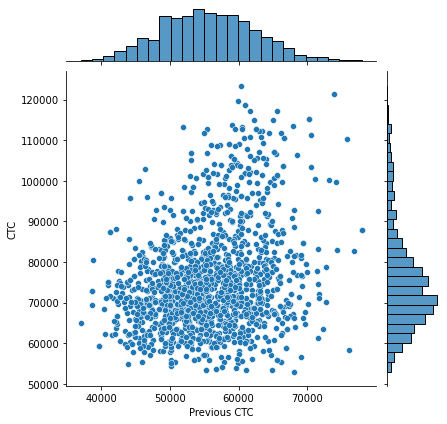

In [10]:
sns.jointplot(x='Previous CTC', y='CTC', data=df)  # The data seems fairly distributed and no such outlier can be seen.

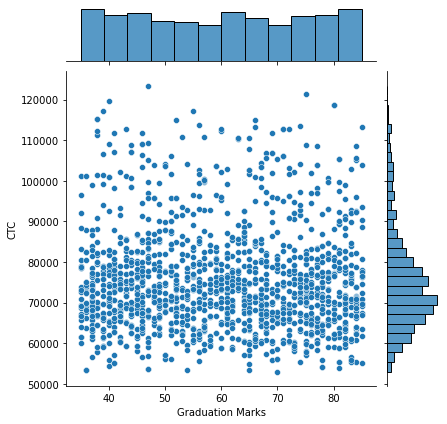

In [11]:
sns.jointplot(x='Graduation Marks', y='CTC', data=df)  # The data seems fairly distributed and no such outlier can be seen.

### Both the Graduation Marks and Previous CTC dont have any such considerable Outliers, So the Data seems fit for the Next Step That is Model Selection

In [12]:
df.corr()   # The Correlation table suggest that all the columns do relate with the dependent variable that is CTC (negatively,
            # positively) on a less scale.
            # And there is no such multi collinearity of the varibles as their correlation values are fairly small.

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Executive
College,1.000000,-0.014132,0.041470,-0.059729,0.004344,0.009064,-0.026282,0.012903
City,-0.014132,1.000000,0.000010,0.058553,-0.014316,-0.020581,-0.013014,0.043584
Previous CTC,0.041470,0.000010,1.000000,0.010004,-0.027740,0.121437,0.262554,-0.016814
Previous job change,-0.059729,0.058553,0.010004,1.000000,0.020345,0.022416,0.005110,0.025111
Graduation Marks,0.004344,-0.014316,-0.027740,0.020345,1.000000,-0.054128,-0.004035,-0.021289
EXP (Month),0.009064,-0.020581,0.121437,0.022416,-0.054128,1.000000,0.295916,0.026618
CTC,-0.026282,-0.013014,0.262554,0.005110,-0.004035,0.295916,1.000000,-0.623223
Executive,0.012903,0.043584,-0.016814,0.025111,-0.021289,0.026618,-0.623223,1.000000


### Splitting Data into Independent and Dependent  Data

In [13]:
X = df.loc[:, df.columns != 'CTC']      # Independent Variables.
Y = df['CTC']                           # Dependent Variable.

### Splitting Data into Training and Testing

In [14]:
x_train, x_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0) # Splitting training and testing into
x_train.shape, x_test.shape, y_train.shape, y_test.shape                                  # 80:20 ratio.

((1234, 7), (309, 7), (1234,), (309,))

In [15]:
scaler = preprocessing.StandardScaler().fit(x_train)  # Transforming the data into a same range so as to get better calculations
x_train = scaler.transform(x_train)                   # and effective Results.
x_test = scaler.transform(x_test)

# Model Selection.

# Q3. What were the available ML model options you had to perform this task?

Now as we are done with the preprocessing and splititng of data into training and testing set, It is time to choose a model which we think will help us predict future salary of employees accurately and Precisely.
1. First thing to notice is that it is a continous values Prediction task that is it's a Regression Problem, so we have to try and use only Regression models like LinearRegression, OLS, Decision Tree etc and not the Classification Models like LogisticRegression which can be quite confusing sometimes.
2. Here is a list of Models which I thought I can experiment with to find which model performs at what level for my proble,
* Ordinary Least Square Model.
* Linear Regression with multiple Variables.
* KNN for Regression.
* Decision Tree Regression.

# OLS Model.

In [16]:
x_train_ols  = sn.add_constant(x_train)                # Adding bias (constant column) in the independent data.
x_test_ols   = sn.add_constant(x_test)
OLS_model = sn.OLS(y_train, x_train_ols).fit()         # Training Model.

y_train_pred = OLS_model.predict(x_train_ols)          # Predicting on Training Data
y_test_pred = OLS_model.predict(x_test_ols)            # Predicting on Test Data

train_mse = mean_squared_error(y_train, y_train_pred)  # Calculating MSE for Training Data
test_mse  = mean_squared_error(y_test, y_test_pred)    # Calculating MSE for Testing Data

train_r2= r2_score(y_train, y_train_pred)              # Calculating R2_score for Training Data
test_r2  = r2_score(y_test, y_test_pred)               # Calculating R2_score for Testing Data

print("Train MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

OLS_model.summary()

Train MSE :  72336582.59216733  | Train R2 :  0.5457115591494669
Test MSE  :  79995757.09450118  | Test R2 :  0.4789893465791988


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     210.4
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          5.47e-205
Time:                        23:04:07   Log-Likelihood:                -12917.
No. Observations:                1234   AIC:                         2.585e+04
Df Residuals:                    1226   BIC:                         2.589e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.517e+04    242.903    309.451      0.000    7.47e+04    7.56e+04
x1          -284.5855    244.229     -1.165      0.244    -763.739     194.568
x2           355.1574    243.528      1.458      0.145    -122.621     832.936
x3          2756.7999    245.859     11.213      0.000    2274.450    3239.150
x4            87.2075    243.904      0.358      0.721    -391.308     565.723
x5           134.3309    243.413      0.552      0.581    -343.221     611.883
x6          3438.5680    245.663     13.997      0.000    2956.602    3920.534
x7         -8061.1489    243.320    -33.130      0.000   -8538.518   -7583.780
==============================================================================
Omnibus:                       36.516   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.110
Skew:                           0.395   Prob(JB):                     1.95e-09
Kurtosis:                       3.397   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* From the above summary we can see that the P-Value for Previous job change and Graduation Marks are quite high ( > 0.5)     ,which can be think of that these parameters are not of much value for our prediction of Independent variable. Although on the other hand all the other columns show high relationship with the to be predicted value.

### Feature Selection
As we can see Previous job change and Graduation marks have really high P value we can also discard them from our data as they wont be much contributing to our prediction model, this is called feature selection but I will not do this as we merely have 7 variables to work with and among 5 others College and City are also weak contributers.So we will procede with all 7 variables throughout the models.

# Linear Regression Model.

In [17]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)                            # Training Model

y_train_pred = LR_model.predict(x_train)                  # Predicting on Training Data
y_test_pred = LR_model.predict(x_test)                    # Predicting on Test Data

train_mse = mean_squared_error(y_train, y_train_pred)     # Calculating MSE for Training Data
test_mse  = mean_squared_error(y_test, y_test_pred)       # Calculating MSE for Testing Data

train_r2= r2_score(y_train, y_train_pred)                 # Calculating R2_score for Training Data
test_r2  = r2_score(y_test, y_test_pred)                  # Calculating R2_score for Testing Data

print("Train MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Train MSE :  72336582.59216732  | Train R2 :  0.545711559149467
Test MSE  :  79995757.0945012  | Test R2 :  0.47898934657919867


->  We wont be able to draw a regression line to with the data as we have multi dimensional (multi variable) data and I dont know to plot it on a 2d graph.

# KNN Model.

In [18]:
KNN_model = KNeighborsRegressor()

param_grid = {"n_neighbors" : [3,4,5,6,7,8],                # Creating a parameter Grid for hyper tuning the parameters.
              "weights" : ['uniform','distance'],
              "p" : [1,2,3]
             }
grid_search = GridSearchCV(KNN_model, param_grid, cv=5, scoring='neg_mean_absolute_error',n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)      #  Getting the best parameters on the basis of
                                                           # 'neg_mean_absolute_error'


optimised_KNN_model = KNeighborsRegressor(n_neighbors=8, p =1, weights='distance',n_jobs=-1)
optimised_KNN_model.fit(x_train, y_train)                  # Training the new optimised model for prediction.

y_train_pred = optimised_KNN_model.predict(x_train)        # Predicting on Training Data
y_test_pred = optimised_KNN_model.predict(x_test)          # Predicting on Test Data

train_mse = mean_squared_error(y_train, y_train_pred)      # Calculating MSE for Training Data
test_mse  = mean_squared_error(y_test, y_test_pred)        # Calculating MSE for Testing Data

train_r2= r2_score(y_train, y_train_pred)                  # Calculating R2_score for Training Data
test_r2  = r2_score(y_test, y_test_pred)                   # Calculating R2_score for Testing Data

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Best Parameters :  {'n_neighbors': 7, 'p': 3, 'weights': 'uniform'}

Train MSE :  0.0  | Train R2 :  1.0
Test MSE  :  75733213.16662274  | Test R2 :  0.5067512039296491


* In KNN we can observe that the model performs perfectly on training data but performs average on testing data this shows a case of overfitting, thats is model is unable to perform on good on testing data inspite performing extraordinary on training data.

# Decision Tree Model.

In [19]:
DT_model = DecisionTreeRegressor(criterion='mse')

param_grid = {"max_depth" : [1,2,3,4,5],                       # Creating a parameter Grid for hyper tuning the parameters.
              "min_samples_split" : [1,2,3,4,5],
              "min_samples_leaf" : [1,2,3,4,5]
             }
grid_search = GridSearchCV(DT_model, param_grid, cv=5, scoring='neg_mean_absolute_error',n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)         #  Getting the best parameters on the basis of
                                                              # 'neg_mean_absolute_error'
optimised_DT_model = DecisionTreeRegressor(criterion='mse',max_depth = 4, min_samples_leaf= 1, min_samples_split= 2)
optimised_DT_model.fit(x_train,y_train)                       # Training the new optimised model for prediction
 
y_train_pred = optimised_DT_model.predict(x_train)            # Predicting on Training Data
y_test_pred = optimised_DT_model.predict(x_test)              # Predicting on Test Data

train_mse = mean_squared_error(y_train, y_train_pred)         # Calculating MSE for Training Data
test_mse  = mean_squared_error(y_test, y_test_pred)           # Calculating MSE for Testing Data

train_r2= r2_score(y_train, y_train_pred)                     # Calculating R2_score for Training Data
test_r2  = r2_score(y_test, y_test_pred)                      # Calculating R2_score for Testing Data

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Best Parameters :  {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}

Train MSE :  56617605.236379914  | Train R2 :  0.6444299317740915
Test MSE  :  67076223.2466465  | Test R2 :  0.5631339939510732


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [           nan -7648.30881988 -7648.30881988 -7648.30881988
 -7648.30881988            nan -7648.30881988 -7648.30881988
 -7648.30881988 -7648.30881988            nan -7648.30881988
 -7648.30881988 -7648.30881988 -7648.30881988            nan
 -7648.30881988 -7648.30881988 -7648.30881988 -7648.30881988
            nan -7648.30881988 -7648.30881988 -7648.30881988
 -7648.30881988            nan -6601.38659918 -6601.38659918
 -6601.38659918 -6601.38659918            nan -6601.38659918
 -6601.38659918 -6601.38659918 -6601.38659918            nan
 -6601.38659918 -6601.38659918 -6601.38659918 -6601.38659918
            nan -6601.38659918 -6601.38659918 -6601.38659918
 -6601.38659918            nan -6601.38659918 -6601.38659918
 -6601.38659918 -6601.38659918            nan -6366.71411774
 -6366.71411774 -6366.71411774 -6366.71411774            nan
 -6366.71411774 

## Visualizing Decision Tree

In [23]:
# from sklearn import tree
# dot_data = tree.export_graphviz(optimised_DT_model)

# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

### For some reason the export_graphviz was not working in my jupyter it was throwing an error of  "graphviz executables files not found" , I tried it multiple times but couldn't do it that's why i commented the code and I think with this we can visualize the desired decision tree.

# Q4. Which model’s performance is best and what could be the possible reason for that ?

1. As we can observe from the summary table OLS and LR model performs similar to each other although the Test MSE for OLS is quite low as compared to LR that is why we have marked it 2nd best model and LR as the 3rd best model.
2. On the other hand DT model performs fairly good as on both training and well as on testing data and have a relatively high R2 score as compared to other models on testing data that it why it is marked as 1st preference.

# Regression Model Summary Table.

  ## <font color='green'>Regression Models</font>
   
                                         Train MSE                Train R2                 Test MSE              Test R2
    
  * Ordinary Least Square (OLS)  :--------------------72336582.59------------------------0.5457-------------------------------- 9995757.09----------------------0.4789   **
  * Linear Regression (LR)       :----------------------------72336582.59------------------------0.5457-------------------------------79995757.09----------------------0.4789 *
  * KNN Regressor     (KNN)      :-----------------------------------------0.0-------------------------1.0------------------------------------75733213.16----------------------0.5067
  * Decision Tree Regressor (DT) :--------------------56617605.23-----------------------0.6444-------------------------------67076223.24----------------------0.5631  ***

After Applying the 4 different models to our data we can see that the Decision Tree Model has performed the best with least Mean squared error (MSE) and highest R2_score among other models on mainly testing data.
###  The Possible reasons for such high r2_score and better performance can be attributed to : 

* Decision trees are capable of capturing non-linear relationships between predictors and the response variable. They can handle complex interactions and non-linear patterns in the data, whereas OLS and LR assume a linear relationship between predictors and the response.
* Decision trees naturally capture interactions between predictors. By splitting the data based on different predictor values at each node, decision trees can identify interactions between variables that may be missed by OLS and LR unless explicitly included as additional terms.
* Decision trees are generally robust to outliers because they use binary splits to partition the data. Outliers have a limited impact on the overall structure of the tree. In contrast, OLS and LR can be influenced by outliers due to the use of least squares estimation, which aims to minimize the sum of squared residuals.
* Decision trees provide a transparent and interpretable model structure. The tree structure allows for clear visualization and understanding of how the predictor variables are used to make predictions. In contrast, OLS and LR may be more challenging to interpret due to the presence of coefficients and assumptions

# Q5. What steps can you take to improve this selected model’s performance even further?

1. One of the most Important step that is Hyper Parameter Tuning is already done for the Decision Tree using the GridSearchCV library which gave us the best parameters for our DecisionTree Regressor Model, like {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}.
2. Another thing which we can do is to apply ensemnle models to our existing Decision Tree model so we can calculate even more generalised and accurate values but decreasing the Variance of overall Decision Tree Regressor Model.
3. Here we tried 4 differnt Ensemble models for our Decision Tree,
* Bagging
* Random Forest
* Gradient Boost
* Ada Boost


# Bagging Model.


In [24]:
Bagg_Regr_model = BaggingRegressor(base_estimator =optimised_DT_model,bootstrap=True,random_state=0,n_jobs=-1)

param_grid = {"n_estimators" : [10,20,50,100],
              "max_samples" : [0.7,0.8,0.9,1],
              "max_features" : [0.8,0.9,1]}

grid_search = GridSearchCV(Bagg_Regr_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)

optimised_Bagg_Regr_model = BaggingRegressor(base_estimator =optimised_DT_model, bootstrap=True, random_state=0,
                                             max_features =0.9, max_samples =0.7, n_estimators = 15)
optimised_Bagg_Regr_model.fit(x_train,y_train)

y_train_pred = optimised_Bagg_Regr_model.predict(x_train)
y_test_pred = optimised_Bagg_Regr_model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)

train_r2= r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Best Parameters :  {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 20}

Train MSE :  54486765.99392734  | Train R2 :  0.6578120353027386
Test MSE  :  63840498.18423379  | Test R2 :  0.5842082020127104


# Random Forest Model.

In [ ]:
RForest_Regr_model = RandomForestRegressor(criterion='mse', bootstrap=True, random_state=0,n_jobs=-1)

param_grid = {"n_estimators" : [10,20,50],
              "max_depth" : [3,4,5],
              "min_samples_split" : [3,5,7],
              "min_samples_leaf" : [3,5,7],
              "max_samples" : [0.8,0.9,1]}

grid_search = GridSearchCV(RForest_Regr_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)

optimised_RForest_Regr_model = RandomForestRegressor(criterion='mse', bootstrap=True, random_state=0,max_depth=5,
                                        max_samples =0.8, n_estimators = 50, min_samples_leaf=3,min_samples_split=5)
optimised_RForest_Regr_model.fit(x_train,y_train)

y_train_pred = optimised_RForest_Regr_model.predict(x_train)
y_test_pred = optimised_RForest_Regr_model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)

train_r2= r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

# Gradient Descent Model.

In [21]:
GB_Regr_model = GradientBoostingRegressor(loss='ls', criterion='friedman_mse',init= optimised_DT_model,random_state=0)

param_grid = {"max_depth" : [3,4,5],
              "min_samples_split" : [3,5,7],
              "n_estimators" : [10,20,50],
              "learning_rate" : [0.001, 0.01, 0.05,0.1]}

grid_search = GridSearchCV(GB_Regr_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)

optimised_GB_Regr_model = GradientBoostingRegressor(loss='ls', criterion='friedman_mse',init= optimised_DT_model,random_state=0
                                                    ,learning_rate=0.05, max_depth=5, min_samples_split=5,
                                                    n_estimators=50)
optimised_GB_Regr_model.fit(x_train,y_train)

y_train_pred = optimised_GB_Regr_model.predict(x_train)
y_test_pred = optimised_GB_Regr_model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)

train_r2= r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Best Parameters :  {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 50}

Train MSE :  43824427.358982466  | Train R2 :  0.7247736890153373
Test MSE  :  67677199.66579054  | Test R2 :  0.5592198473987899


# Ada Boost Model.

In [22]:
AB_Regr_model = AdaBoostRegressor(base_estimator=optimised_DT_model ,loss='linear',random_state=0)

param_grid = {"n_estimators" : [10,25,50,100],
              "learning_rate" : [0.005,0.01, 0.05, 1]}

grid_search = GridSearchCV(AB_Regr_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(x_train, y_train)
print("Best Parameters : ", grid_search.best_params_)

optimised_AB_Regr_model = AdaBoostRegressor(base_estimator=optimised_DT_model ,loss='linear',random_state=0,
                                            learning_rate = 0.005, n_estimators = 25)
optimised_AB_Regr_model.fit(x_train,y_train)

y_train_pred = optimised_AB_Regr_model.predict(x_train)
y_test_pred = optimised_AB_Regr_model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse  = mean_squared_error(y_test, y_test_pred)

train_r2= r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

print("\nTrain MSE : ", train_mse, " | Train R2 : ", train_r2)
print("Test MSE  : " , test_mse,  " | Test R2 : ", test_r2)

Best Parameters :  {'learning_rate': 0.005, 'n_estimators': 100}

Train MSE :  54535079.12817386  | Train R2 :  0.6575086190001853
Test MSE  :  63606760.252795145  | Test R2 :  0.5857305321563481


#  Final Summary Table.

  ## <font color='green'>Regression Models</font>
   
                                         Train MSE                Train R2                 Test MSE              Test R2
    
  * Ordinary Least Square (OLS)  :--------------------72336582.59------------------------0.5457-------------------------------- 9995757.09----------------------0.4789 **
  * Linear Regression (LR)       :----------------------------72336582.59------------------------0.5457-------------------------------79995757.09----------------------0.4789 *
  * KNN Regressor     (KNN)      :-----------------------------------------0.0-------------------------1.0------------------------------------75733213.16----------------------0.5067
  * Decision Tree Regressor (DT) :--------------------56617605.23-----------------------0.6444-------------------------------67076223.24----------------------0.5631 ***
  
## <font color='Red'>Ensemble Models</font>
    
                                         Train MSE                Train R2                 Test MSE              Test R2
       
  * Bagging Regressor            :--------------------------------54486765.99----------------------------0.6578--------------------------- 63840498.18------------------------0.4789
  * Random Forest Regressor      :----------------------49245556.39----------------------------0.6907--------------------------- 62261004.18------------------------0.5944 ***
  * Gradient Boost Regressor     :-----------------------43824427.35----------------------------0.7247--------------------------- 67677199.66------------------------0.5592 *
  * Ada Boost Regressor          :-----------------------------54535079.12----------------------------0.6575--------------------------- 63606760.25------------------------0.5857 **

1. In the ensemble model we can conclude that Random Forest Regressor and Ada Boost Regressor out performs the other two enseble model with Random Forest performing slightly better than Ada Boost with higher R2_score and less MSE thats why they have been marked 1st and 2nd preference respectively.
2. On the other hand Gradient boost also performs above the mark with lower MSE but a relatively higher R2_score only in training data and not in testing data that is why it has been marked as 3rd preference.

* Random Forests are well-suited for capturing non-linear relationships between predictors and the response variable. They achieve this by building a large number of decision trees, each trained on a different subset of the data with random feature selection. The ensemble of trees can collectively model complex non-linear relationships. Gradient Boosting and AdaBoost, while also capable of handling non-linear relationships, may require more iterations to achieve similar performance.
*  Random Forests incorporate randomness by using subsets of features and bootstrap sampling during the tree-building process. This randomness promotes model diversity, which can help reduce overfitting and improve generalization performance. Gradient Boosting and AdaBoost, on the other hand, sequentially build models by focusing on the misclassified or residual samples, which can potentially lead to overfitting if not properly regularized.
* Random Forests incorporate randomness by using subsets of features and bootstrap sampling during the tree-building process. This randomness promotes model diversity, which can help reduce overfitting and improve generalization performance. Gradient Boosting and AdaBoost, on the other hand, sequentially build models by focusing on the misclassified or residual samples, which can potentially lead to overfitting if not properly regularized.